In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
diabetes_patients = df.loc[df.diabetes != 0]
diabetes_patients

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
56,0,54,1.0,1,9.0,0.0,0,0,1,266.0,114.0,76.0,17.61,88.0,55.0,0
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
4154,1,52,2.0,0,0.0,0.0,0,1,1,269.0,157.5,83.0,26.60,70.0,80.0,0
4203,1,63,1.0,1,10.0,0.0,0,0,1,240.0,146.0,84.0,30.48,75.0,120.0,0
4215,0,63,1.0,0,0.0,0.0,0,1,1,236.0,155.0,82.0,39.17,78.0,79.0,0


In [5]:
age_CHD_dia = diabetes_patients[['age', 'TenYearCHD']].copy()
age_CHD_dia

,age,TenYearCHD
37,52,0
44,53,1
56,54,0
66,62,0
96,63,0
...,...,...
4096,56,1
4154,52,0
4203,63,0
4215,63,0


In [6]:
young_CHD_dia = age_CHD_dia.loc[age_CHD_dia.age < 50].copy()
young_CHD_dia.sort_values(by=['age'],inplace=True)
young_CHD_dia.TenYearCHD.sum()

8

In [7]:
prob_CHD_dia = young_CHD_dia.TenYearCHD.sum() / len(young_CHD_dia)
prob_CHD_dia = prob_CHD_dia*100
prob_CHD_dia

28.57142857142857

<AxesSubplot:xlabel='age'>

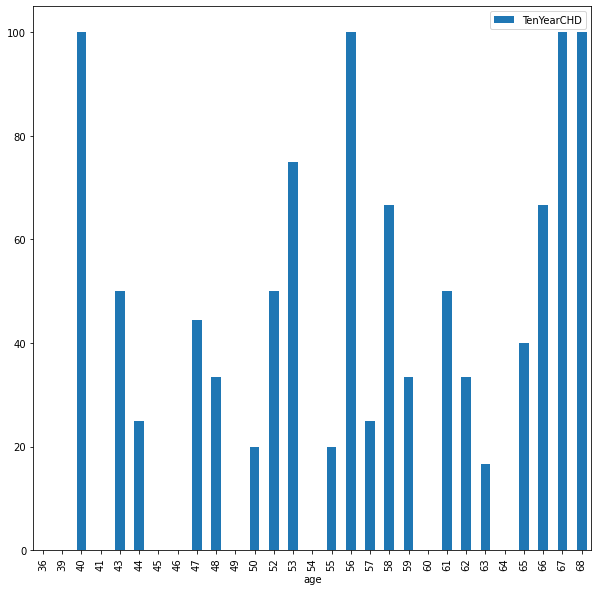

In [8]:
age_CHD_dia = age_CHD_dia.groupby('age').mean() * 100
age_CHD_dia.sort_values(by=['age'],inplace=True)

age_CHD_dia.plot(kind="bar",figsize=(10,10))

In [9]:
non_diabetes_patients = df.loc[df.diabetes == 0]
non_diabetes_patients

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [10]:
age_CHD = non_diabetes_patients[['age', 'TenYearCHD']].copy()
age_CHD

,age,TenYearCHD
0,39,0
1,46,0
2,48,0
3,61,1
4,46,0
...,...,...
4235,48,0
4236,44,0
4237,52,0
4238,40,0


In [11]:
young_CHD_non_dia = age_CHD.loc[age_CHD.age < 50].copy()
young_CHD_non_dia.sort_values(by=['age'],inplace=True)
young_CHD_non_dia.TenYearCHD.sum()

182

In [12]:
prob_CHD_non_dia = young_CHD_non_dia.TenYearCHD.sum() / len(young_CHD_non_dia)
prob_CHD_non_dia = prob_CHD_non_dia*100
prob_CHD_non_dia

8.314298766560073

<AxesSubplot:xlabel='age'>

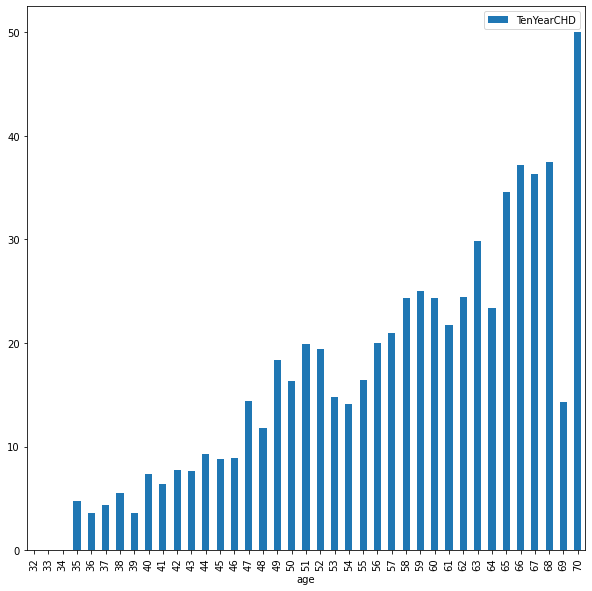

In [13]:
age_CHD = age_CHD.groupby('age').mean() * 100
age_CHD.sort_values(by=['age'],inplace=True)
age_CHD.plot(kind="bar",figsize=(10,10))

### Are patients with diabetes more likely to develop heart disease at an early age?
The previous analysis of the diabetic patients and non diabetic patients, The probability shows that the diabetic patients are more prone to have a heart disease than the non diabetic patients.

In [14]:
dem_CHD = df[['male', 'TenYearCHD', 'education','age']].copy()
dem_CHD

,male,TenYearCHD,education,age
0,1,0,4.0,39
1,0,0,2.0,46
2,1,0,1.0,48
3,0,1,3.0,61
4,0,0,3.0,46
...,...,...,...,...
4235,0,0,2.0,48
4236,0,0,1.0,44
4237,0,0,2.0,52
4238,1,0,3.0,40


In [15]:
dem_CHD = dem_CHD.rename(columns={'male': 'gender'})
dem_CHD['gender'] = dem_CHD['gender'].map({1:'male', 0:'female'})
dem_CHD

,gender,TenYearCHD,education,age
0,male,0,4.0,39
1,female,0,2.0,46
2,male,0,1.0,48
3,female,1,3.0,61
4,female,0,3.0,46
...,...,...,...,...
4235,female,0,2.0,48
4236,female,0,1.0,44
4237,female,0,2.0,52
4238,male,0,3.0,40


In [16]:
dem_CHD_male = dem_CHD.loc[dem_CHD.gender == 'male']
dem_CHD_male = dem_CHD_male.drop(['gender', 'age'], axis = 1)
dem_CHD_male = dem_CHD_male.groupby('education').mean() * 100
dem_CHD_male

,TenYearCHD
education,
1.0,21.879022
2.0,13.905930
3.0,16.444444
4.0,19.927536


<AxesSubplot:xlabel='education'>

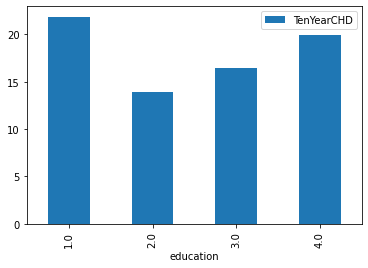

In [17]:
dem_CHD_male.plot(kind='bar')

<AxesSubplot:xlabel='education'>

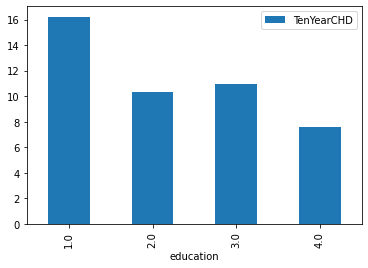

In [18]:
dem_CHD_female = dem_CHD.loc[dem_CHD.gender == 'female']
dem_CHD_female = dem_CHD_female.drop(['gender', 'age'], axis = 1)
dem_CHD_female = dem_CHD_female.groupby('education').mean() * 100
dem_CHD_female.plot(kind='bar')

<AxesSubplot:xlabel='age'>

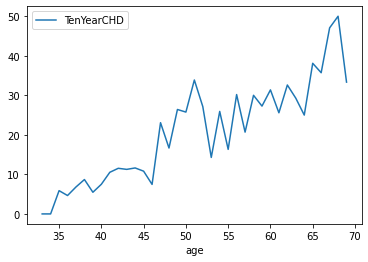

In [19]:
dem_CHD_male = dem_CHD.loc[dem_CHD.gender == 'male']
dem_CHD_male = dem_CHD_male.drop(['gender','education'], axis = 1)
dem_CHD_male = dem_CHD_male.groupby('age').mean() * 100
dem_CHD_male.plot()

<AxesSubplot:xlabel='age'>

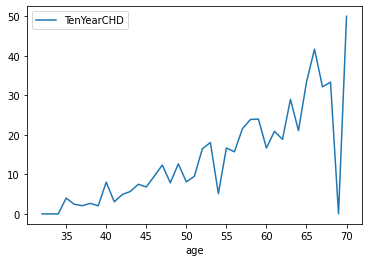

In [20]:
dem_CHD_female = dem_CHD.loc[dem_CHD.gender == 'female']
dem_CHD_female = dem_CHD_female.drop(['gender','education'], axis = 1)
dem_CHD_female = dem_CHD_female.groupby('age').mean() * 100
dem_CHD_female.plot()

## Is there a certain demographic group that is at higher risk of heart disease than others?
We can see from the analytical relation between the level of education and the probability of having CHD for males is that the average level of education is less likely to have a CHD. We notice an interesting observation in the females education and CHD relation which is that the high level of education is less likely to have CHD.However the relation between the age and CHD is pretty similar in both the females and males.

In [21]:
smoker_CHD = df[['TenYearCHD', 'currentSmoker']].copy()
smoker_CHD

,TenYearCHD,currentSmoker
0,0,0
1,0,0
2,0,1
3,1,1
4,0,1
...,...,...
4235,0,1
4236,0,1
4237,0,0
4238,0,0


In [22]:
smoker_CHD = smoker_CHD.groupby('currentSmoker').mean() * 100
smoker_CHD

,TenYearCHD
currentSmoker,
0,14.498834
1,15.894988


<AxesSubplot:xlabel='currentSmoker'>

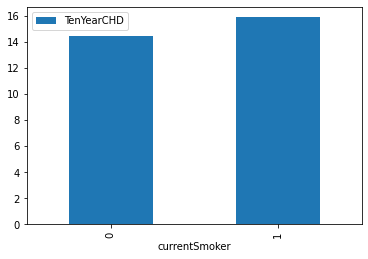

In [23]:
smoker_CHD.plot(kind='bar')

## Are smokers more likely to develop heart disease than non-smokers?
From the previous analysis we can see that smokers have slightly more chance of getting CHD than non smokers.

In [24]:
CHD_CHOL = df[['totChol','TenYearCHD']].copy()
CHD_CHOL = CHD_CHOL.dropna()
CHD_CHOL = CHD_CHOL.sort_values(by='totChol')
CHD_CHOL

,totChol,TenYearCHD
1624,107.0,1
2525,113.0,0
4066,119.0,0
2443,124.0,1
1869,126.0,0
...,...,...
543,439.0,1
3474,453.0,0
194,464.0,1
1111,600.0,1


In [25]:
CHD_CHOL = CHD_CHOL.groupby(pd.cut(CHD_CHOL.totChol, 10, include_lowest=True)).mean() * 100
CHD_CHOL = CHD_CHOL.dropna()
CHD_CHOL

,totChol,TenYearCHD
totChol,,
"(106.41, 165.9]",15591.463415,10.365854
"(165.9, 224.8]",20058.327974,13.054662
"(224.8, 283.7]",25022.181243,15.806112
"(283.7, 342.6]",30423.260437,19.483101
"(342.6, 401.5]",36041.666667,20.000000
"(401.5, 460.4]",42271.428571,42.857143
"(460.4, 519.3]",46400.000000,100.000000
"(578.2, 637.1]",60000.000000,100.000000
"(637.1, 696.0]",69600.000000,0.000000


In [26]:
#CHD_CHOL.totChol.loc[(CHD_CHOL.totChol < 240)] = 'normal'
#CHD_CHOL.totChol.loc[(CHD_CHOL.totChol != 'normal')] = 'high'
#CHD_CHOL

In [27]:
#CHD_CHOL = CHD_CHOL.groupby('totChol').mean() * 100
#CHD_CHOL

<AxesSubplot:xlabel='totChol'>

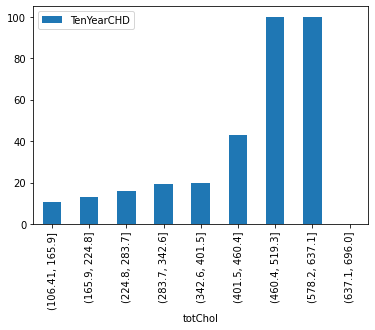

In [28]:
CHD_CHOL.plot(kind='bar', y = 'TenYearCHD')

## Can different levels of Cholestrol effect the possiblity of having CHD?
As we can see from the above analysis that the higher the cholestrol level the higher the possibility of having CHD.